# **Support Vector Machine**


In this notebook, we will perform a Support Vector Machine classification model, which is an effective classification model, we will be using a real-world diabetes food items suggestion dataset, which contains detailed nutrition information about a food item. The objective is to classify what food a diabetic patient should choose More Often or Less Often for a specific food item given its nutrients.

First we import the neccesary libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [2]:
# Setup a random seed to be 43
rs = 43 

### EDA and Feature Engineering

For this project we will be using the dataset food_items_binary.csv which is located in this same repository, which contains detailed nutrition information about food items for people with diabetes. The objective is to classify whether a diabetic patient should choose More Often or Less Often for a specific food item given its nutrients, this data set doesn't contain the object data type and also we don't have to apply any scalar function, so we can use the data set directly

First, let's load the dataset as a Pandas dataframe.

In [3]:
#We load the dataset
food_df = pd.read_csv('food_items_binary.csv')
# food_df.shape #(7639, 19)
food_df.head()

,Unnamed: 0,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,0
1,1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,0
2,2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,0
3,3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,0
4,4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,0


Now with the info() function, we'll see if there's Non-Null Values and the data type.

In [4]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7639 entries, 0 to 7638
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7639 non-null   int64  
 1   Calories             7639 non-null   float64
 2   Total Fat            7639 non-null   int64  
 3   Saturated Fat        7639 non-null   float64
 4   Monounsaturated Fat  7639 non-null   float64
 5   Polyunsaturated Fat  7639 non-null   float64
 6   Trans Fat            7639 non-null   float64
 7   Cholesterol          7639 non-null   int64  
 8   Sodium               7639 non-null   float64
 9   Total Carbohydrate   7639 non-null   float64
 10  Dietary Fiber        7639 non-null   float64
 11  Sugars               7639 non-null   float64
 12  Sugar Alcohol        7639 non-null   int64  
 13  Protein              7639 non-null   float64
 14  Vitamin A            7639 non-null   int64  
 15  Vitamin C            7639 non-null   i

We can see from the above result we have no NULL values in our dataset and all of them are int64 and float64 which means there are no object variables and our target variable is class.

Now we use the describe() method from pandas to see some statistics.

In [5]:
food_df.describe()

,Unnamed: 0,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
count,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000
mean,3819.000000,105.098835,2.318235,0.368920,0.309216,0.264116,0.007069,4.308679,235.053659,15.510719,1.806074,3.734756,0.059039,4.298975,6.636733,6.487237,3.937688,5.510014,0.129598
std,2205.333686,77.224368,3.438941,0.737164,1.310260,2.848250,0.094783,14.788162,252.438163,14.028570,4.099947,5.013685,0.771173,5.349881,19.658111,19.566500,7.892694,9.855960,0.335883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1909.500000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.700000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3819.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,13.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5728.500000,140.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,375.500000,24.000000,3.000000,5.000000,0.000000,6.000000,6.000000,4.000000,4.000000,8.000000,0.000000
max,7638.000000,2210.000000,24.000000,8.000000,16.800000,235.000000,2.500000,450.000000,2220.000000,270.000000,305.000000,39.000000,19.000000,70.000000,370.000000,280.000000,110.000000,100.000000,1.000000


We'll get rid of the 'Unnamed: 0' colum because it's just an index and we don need it anymore.

In [6]:
feature_cols = [i for i in food_df.columns if i != 'Unnamed: 0']
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron',
 'class']

As we can see from the outputs above, this dataset contains 17 types of nutrients about a food item such as Calories, Total Fat, Protein, Sugar, and so on, as numeric variables.


In [7]:
food_df = food_df[feature_cols]
X = food_df.iloc[:, :-1]
y = food_df.iloc[:, -1:]

Next, let's check the target variable, such as the class column to see what are label values and their distribution.

In [8]:
# # Get the row entries with the last col 'class'
y.value_counts(normalize=True)

class
0        0.870402
1        0.129598
dtype: float64

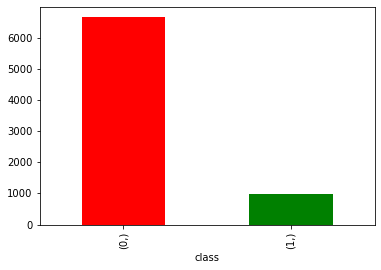

In [9]:
y.value_counts().plot.bar(color=['red', 'green'])

As we can see from the bar chart above, this dataset has two classes Less Often and More Often. The two labels are imbalanced with most food items should be chosen less often for diabetic patients, we need to find out whether it is necessary to apply any class balance method or not, depending on the SVM model.

### Build a SVM model without solving the imbalanced problem


Now let's split the training and testing dataset.

In [10]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

First we define a SVC model and train the model with the trining dataset.

In [11]:
#we instantiate the model
model = SVC()
#We fit the model 
model.fit(X_train, y_train.values.ravel())

SVC()

NOw we need to make the predictions.

In [12]:
preds = model.predict(X_test)

First we defined a utility method to evaluate the model performance.

In [13]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [14]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9587696335078534,
 'recall': 0.7878787878787878,
 'precision': 0.8813559322033898,
 'f1score': 0.832}

As we can see from the evaluation results above, the default SVM model achieves relatively good performance on this binary classification task. The overall accuracy is around 0.95 and the f1score is around 0.83.


Now, we can try to create a better classification model, tunning the parameters.

### Using GridSearch to tune the Kernels and parameter C.

Let's first define some candidate parameter values.

In [15]:
params_grid = {'C': [1, 10, 100],
               'kernel': ['poly', 'rbf', 'sigmoid']}

We define the SVM model.


In [16]:
model = SVC()

Now we define the GridSearchCV to search the best parameters.

In [17]:
grid_search = GridSearchCV(estimator = model, param_grid = params_grid, 
                           scoring='f1', cv = 5, verbose = 1)

grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


We show the best parameters.

In [18]:
best_params

{'C': 100, 'kernel': 'rbf'}

We can see C=100 and kernel=rbf seems to produce the highest f1score. Now let's try this combination to see the model performance.

In [19]:
# We define the model
model = SVC(C=100, kernel='rbf')
#We fit the model with X_train y y_train
model.fit(X_train, y_train.values.ravel())
#We use the X_test data to predict the new data
preds = model.predict(X_test)
#We evaluate the model with y_test
evaluate_metrics(y_test, preds)

{'accuracy': 0.9633507853403142,
 'recall': 0.8787878787878788,
 'precision': 0.8446601941747572,
 'f1score': 0.8613861386138614}

Now the f1score becomes 0.86 after the tunning and the accuracy is 0.96.

### Confusion matrix

Now we will plot the confusion matrix based on the last output and we will visualize it using a heatmap method.

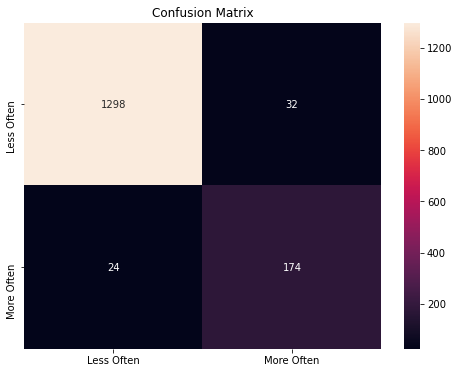

In [20]:
cf = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["Less Often", "More Often"], yticklabels=["Less Often", "More Often"])
ax.set(title="Confusion Matrix");

As we can see from the above confusion matrix, the diaginal represents thecases where the model predicted true positives (TP), for example In the less-often case of 1330 cases, the model correctly predicted 1298, and 32 were incorrectly predicted.